In [1]:
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
with open('mnist_train.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

data = data[1:]

xs = [a[1:] for a in data]
ys = [a[0] for a in data]

xs = np.array(xs).reshape((60000, 28, 28, 1)).astype(int)
ys = np.array(ys)

xs = xs/255
ys = tf.keras.utils.to_categorical(ys, num_classes=10)


print(xs.shape)
print(ys.shape)

(60000, 28, 28, 1)
(60000, 10)


In [ ]:
import pickle

with open('./xs','wb') as f: pickle.dump(xs, f)
with open('./ys','wb') as f: pickle.dump(ys, f)

In [ ]:
l = tf.keras.layers

model = tf.keras.models.Sequential([
    l.Conv2D(filters=16, kernel_size=3, padding='valid', input_shape=(28, 28, 1)),
    l.Conv2D(filters=8, kernel_size=3, padding='valid'),
    l.Conv2D(filters=4, kernel_size=3, padding='valid'),
    l.Conv2D(filters=2, kernel_size=3, padding='valid'),

    l.Flatten(),

    l.Dense(512, activation='relu'),
    l.Dropout(0.5),

    l.Dense(256, activation='relu'),
    l.Dropout(0.5),

    l.Dense(128, activation='relu'),
    l.Dropout(0.5),

    l.Dense(64, activation='relu'),
    l.Dropout(0.5),

    l.Dense(32, activation='relu'),
    l.Dropout(0.5),

    l.Dense(10, activation='softmax'),
])

model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
# metrics = [tf.keras.metrics.Accuracy()]

model.compile(optimizer, loss, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
for i in range(10):
    plt.imshow(xs[i])
    plt.show()

    x = np.array([xs[i]])
    y = model.predict(x)[0]

    for num in range(10):
        print(f'{num} -> {round(y[num], 2)}')

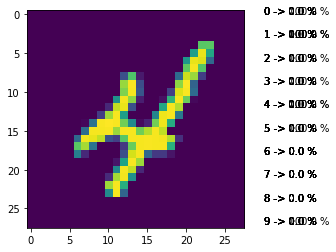

In [31]:
for i in range(10):
    plt.imshow(xs[i])
    # plt.show()
    title = ''

    x = np.array([xs[i]])
    y = model.predict(x)[0]

    for num in range(10):
        plt.text(30, 3*num, f'{num} -> {round(y[num]*100, 2)} %')
    #     title += f'{num} -> {round(y[num], 2)} %'

    # plt.title(title)

    plt.savefig(f'./corrects/{i}.jpg')

In [ ]:
model.fit(xs, ys)

In [ ]:
model.save('./model.h5')

In [17]:
model = tf.keras.models.load_model('./model.h5')

In [6]:
with open('mnist_test.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

data = data[1:]

xs_test = [a[1:] for a in data]
ys_test = [a[0] for a in data]

xs_test = np.array(xs_test).reshape((10000, 28, 28, 1)).astype(int)
ys_test = np.array(ys_test)

xs_test = xs_test/255
ys_test = tf.keras.utils.to_categorical(ys_test, num_classes=10)


print(xs_test.shape)
print(ys_test.shape)

(10000, 28, 28, 1)
(10000, 10)


In [5]:
for i in range(10):
    plt.imshow(xs_test[i])
    plt.show()

    x = np.array([xs_test[i]])
    y = model.predict(x)[0]

    for num in range(10):
        print('{} -> {:.2f}'.format(num,y[num]))

NameError: name 'xs_test' is not defined

In [18]:
model.evaluate(xs_test, ys_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.1272 - accuracy: 0.9852


[0.12719398736953735, 0.9851999878883362]

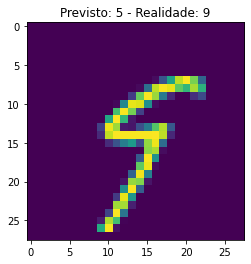

In [16]:
from tqdm import tqdm  


ys_pred = model.predict(xs_test)


for i in range(10000):

    y_pred = np.argmax(ys_pred[i])
    real_y = np.argmax(ys_test[i])

    if y_pred != real_y:
        plt.imshow(xs_test[i])
        plt.title(f'Previsto: {y_pred} - Realidade: {real_y}')
        # plt.show()
        plt.savefig(f'./errors/{i}.jpg')